In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations               
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import seaborn as sns # For data visualization

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('tripdata.csv')

In [3]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [4]:
data.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
68618,850,2010-11-18 08:26:59,2010-11-18 08:41:09,31618,4th & East Capitol St NE,31604,3rd & H St NW,W01082,Member
41214,476,2010-11-01 19:55:31,2010-11-01 20:03:27,31213,17th & K St NW,31600,5th & K St NW,W00938,Member
48368,566,2010-11-06 19:41:49,2010-11-06 19:51:16,31101,14th & V St NW,31106,Calvert & Biltmore St NW,W00915,Member
20026,174,2010-10-18 19:08:00,2010-10-18 19:10:54,31204,20th & E St NW,31205,21st & I St NW,W01015,Member
26941,355,2010-10-24 00:07:06,2010-10-24 00:13:01,31101,14th & V St NW,31229,New Hampshire Ave & T St NW,W00955,Member


In [5]:
data.describe()

,Duration,Start station number,End station number
count,115597.000000,115597.000000,115597.000000
mean,1254.649956,31266.213431,31268.042250
std,2914.317998,187.645048,186.194316
min,60.000000,31000.000000,31000.000000
25%,403.000000,31110.000000,31111.000000
50%,665.000000,31213.000000,31214.000000
75%,1120.000000,31301.000000,31238.000000
max,85644.000000,31805.000000,31805.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115597 entries, 0 to 115596
Data columns (total 9 columns):
Duration                115597 non-null int64
Start date              115597 non-null object
End date                115597 non-null object
Start station number    115597 non-null int64
Start station           115597 non-null object
End station number      115597 non-null int64
End station             115597 non-null object
Bike number             115597 non-null object
Member type             115597 non-null object
dtypes: int64(3), object(6)
memory usage: 7.9+ MB


In [7]:
data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')

In [8]:
#Exploring the Target Variable. Our target variable is the Member Type column
data['Member type'].value_counts()



Member     91586
Casual     24001
Unknown       10
Name: Member type, dtype: int64

In [53]:
import seaborn as sn
import matplotlib.pyplot as plt

In [51]:
corrmat=data.corr()

In [55]:
corrmat

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type
Duration,1.000000,-0.000712,0.031957,-0.000730,0.029655,0.003816,-0.336052
Start station number,-0.000712,1.000000,0.237748,0.458680,0.054077,-0.001643,-0.000315
Start station,0.031957,0.237748,1.000000,0.044544,0.124345,-0.002068,-0.056118
End station number,-0.000730,0.458680,0.044544,1.000000,0.216569,-0.002493,0.004028
End station,0.029655,0.054077,0.124345,0.216569,1.000000,-0.002933,-0.059230
Bike number,0.003816,-0.001643,-0.002068,-0.002493,-0.002933,1.000000,-0.009545
Member type,-0.336052,-0.000315,-0.056118,0.004028,-0.059230,-0.009545,1.000000


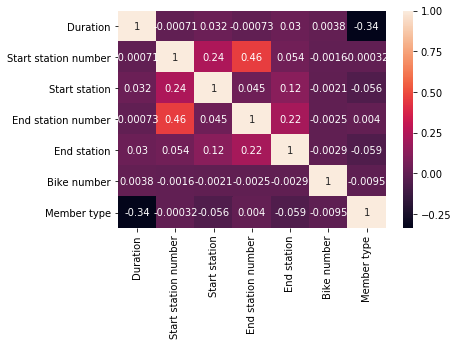

In [54]:
sn.heatmap(corrmat, annot=True)
plt.show()

In [9]:
#Checking for missing values in any column/features
data.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [10]:
#Convert the Categorical Values to Numerical to allow us perform plotting
#library LabelEncoder
from sklearn.preprocessing import LabelEncoder
#Create a list with categorical predictors
cat_var =['Start station','End station','Bike number','Member type']
le = LabelEncoder() 
#A for loop to transform the categorical values to numerical values
for n in cat_var:
    data[n] = le.fit_transform(data[n])

In [14]:
np.corrcoef(data['Duration'],data['Member type'])


array([[ 1.        , -0.33605193],
       [-0.33605193,  1.        ]])

In [16]:
np.corrcoef(data['Start station number'],data['Member type'])


array([[ 1.00000000e+00, -3.15357412e-04],
       [-3.15357412e-04,  1.00000000e+00]])

In [17]:
np.corrcoef(data['End station number'],data['Member type'])


array([[1.        , 0.00402833],
       [0.00402833, 1.        ]])

In [26]:
np.corrcoef(data['Start station'],data['Member type'])


array([[ 1.        , -0.05611836],
       [-0.05611836,  1.        ]])

In [27]:
np.corrcoef(data['End station'],data['Member type'])


array([[ 1.        , -0.05922972],
       [-0.05922972,  1.        ]])

In [29]:
np.corrcoef(data['Bike number'],data['Member type'])


array([[ 1.        , -0.00954496],
       [-0.00954496,  1.        ]])

### Drop the irrelevant columns

In [46]:
newdata = data.drop(['End date','Start date','Start station','End station'],axis=1)

In [48]:
newdata.head()

,Duration,Start station number,End station number,Bike number,Member type
0,1012,31208,31108,614,1
1,61,31209,31209,41,1
2,2690,31600,31100,836,1
3,1406,31600,31602,282,1
4,1413,31100,31201,734,1


### Here as we see the corelation is -0.33 for duration and member type so there is no significant change in the accuracy

array([[ 1.        , -0.00954496],
       [-0.00954496,  1.        ]])

In [11]:
data.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station            int64
End station number       int64
End station              int64
Bike number              int64
Member type              int64
dtype: object

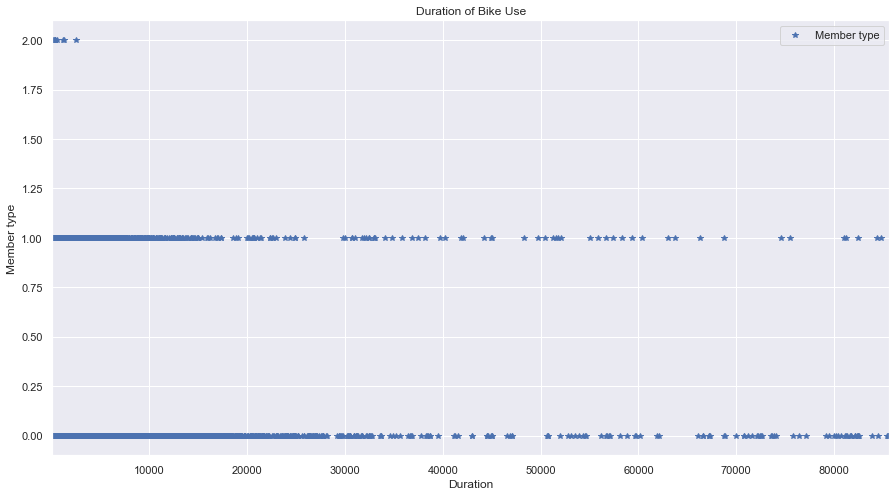

In [26]:
#Explore the relationship between duration and member type
data.plot( x='Duration', y='Member type',style='*')  
plt.title('Duration of Bike Use')  
plt.xlabel('Duration')  
plt.ylabel('Member type')  
plt.show() 

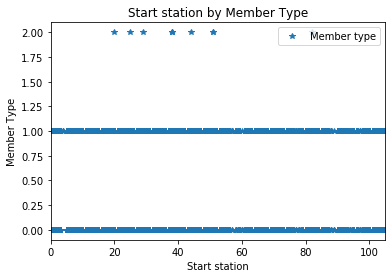

In [11]:
#Explore the relationship between Start Station and member type
data.plot( x='Start station', y='Member type',style='*')  
plt.title('Start station by Member Type')  
plt.xlabel('Start station')  
plt.ylabel('Member Type')  
plt.show()  

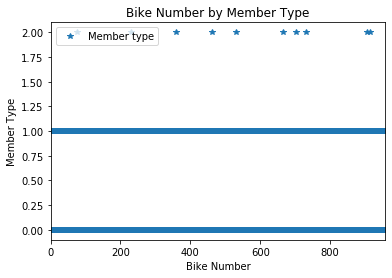

In [12]:
#Explore the relationship between Bike Number and member type
data.plot( x='Bike number', y='Member type',style='*')  
plt.title('Bike Number by Member Type')  
plt.xlabel('Bike Number')  
plt.ylabel('Member Type')  
plt.show()  

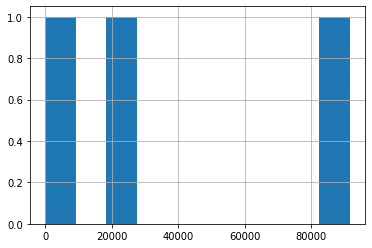

In [13]:
#Lets plot a simple bar graph on the target variable
data['Member type'].value_counts().hist()

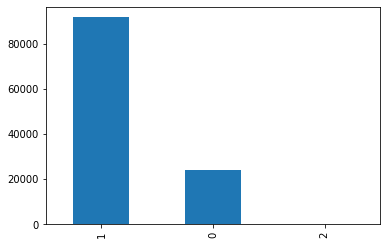

In [14]:
data['Member type'].value_counts().plot.bar();

### Consider 0th, 3rd, and 5th column for predictions because rest ot them are irrelevant w.r.t training a model

In [15]:
# Assign X and y
X = data.iloc[:, [0, 3, 5]].values 
y = data.iloc[:, -1].values

In [16]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y.flatten())



In [17]:
print(y)

[1 1 1 ... 1 1 0]


In [18]:
# 1. Splitting X,y into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



### Decision Tree

In [19]:
tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Check the Accuracy
score = metrics.accuracy_score(y_test, y_pred)
dt_score = score*100
print("Accuracy of our model is: {:.1f}%".format(score*100))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of our model is: 86.0%
[[ 2219  2655]
 [  583 17663]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58      4874
           1       0.87      0.97      0.92     18246

   micro avg       0.86      0.86      0.86     23120
   macro avg       0.83      0.71      0.75     23120
weighted avg       0.85      0.86      0.84     23120



### Take only 2 attri

In [20]:
# Assign X and y
X1 = data.iloc[:, [3, 5]].values 
y1 = data.iloc[:, -1].values

In [21]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y1 = le.fit_transform(y1.flatten())



In [23]:
print(y1)

[1 1 1 ... 1 1 0]


In [24]:
# 1. Splitting X,y into Train & Test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)



In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)

# Find Score
score1 = metrics.accuracy_score(y_test1, y_pred1)
knn_score1 = score1*100
print("Accuracy of our model is: {:.1f}%".format(score1*100))
print(classification_report(y_test1, y_pred1))

Accuracy of our model is: 80.6%
              precision    recall  f1-score   support

           0       0.56      0.36      0.44      4874
           1       0.84      0.93      0.88     18246

   micro avg       0.81      0.81      0.81     23120
   macro avg       0.70      0.64      0.66     23120
weighted avg       0.78      0.81      0.79     23120



In [30]:
tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
tree.fit(X_train1, y_train1)
y_pred2 = tree.predict(X_test1)

# Check the Accuracy
score2 = metrics.accuracy_score(y_test1, y_pred2)
dt_score2 = score2*100
print("Accuracy of our model is: {:.1f}%".format(score2*100))
print(confusion_matrix(y_test1, y_pred2))
print(classification_report(y_test1, y_pred2))

Accuracy of our model is: 78.9%
[[    0  4874]
 [    0 18246]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4874
           1       0.79      1.00      0.88     18246

   micro avg       0.79      0.79      0.79     23120
   macro avg       0.39      0.50      0.44     23120
weighted avg       0.62      0.79      0.70     23120



/home/sky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sky/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Neural Network

In [20]:


from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

# Scaling improvised the model's results. So, scale the data.
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Train the Neural Net.
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # performing prediction

print(y_pred)



/home/sky/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sky/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sky/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[1 1 1 ... 1 1 1]


In [21]:
# Calculate the accuracy, confusion matrix, and report of the performed predictions of our Neural Net.
score = metrics.accuracy_score(y_test, y_pred)
nn_score = score*100
print("Accuracy of our model is: {:.1f}%".format(score*100))
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of our model is: 86.1%
              precision    recall  f1-score   support

           0       0.83      0.43      0.57      4874
           1       0.87      0.98      0.92     18246

   micro avg       0.86      0.86      0.86     23120
   macro avg       0.85      0.70      0.74     23120
weighted avg       0.86      0.86      0.84     23120



### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Find Score
score = metrics.accuracy_score(y_test, y_pred)
knn_score = score*100
print("Accuracy of our model is: {:.1f}%".format(score*100))
print(classification_report(y_test, y_pred))

Accuracy of our model is: 85.3%
              precision    recall  f1-score   support

           0       0.71      0.50      0.59      4874
           1       0.88      0.95      0.91     18246

   micro avg       0.85      0.85      0.85     23120
   macro avg       0.80      0.72      0.75     23120
weighted avg       0.84      0.85      0.84     23120



In [23]:
scores = [dt_score,nn_score,knn_score]
algorithms = ["Decision Tree","Neural network","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Decision Tree is: 85.99480968858131 %
The accuracy score achieved using Neural network is: 86.1461937716263 %
The accuracy score achieved using K-Nearest Neighbors is: 85.26384083044982 %


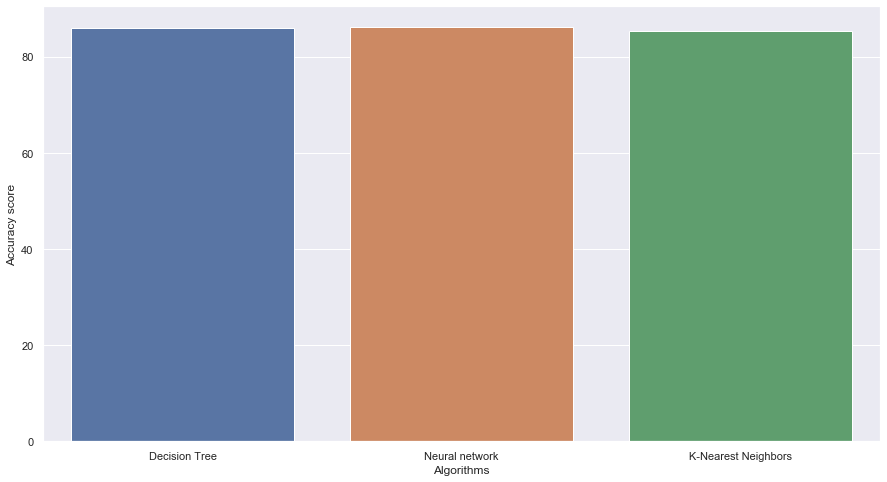

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)